# Analyse Std Dev Markit France

In [1]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 

In [2]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
data = pd.read_csv(r"Data Mark-It Raw 08.csv")

data = data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]

In [3]:
short_term = ['2022-05-31 00:00:00', '2022-06-30 00:00:00',
       '2022-07-31 00:00:00', '2022-08-31 00:00:00',
       '2022-09-30 00:00:00', '2022-10-31 00:00:00',
       '2022-11-30 00:00:00', '2022-12-31 00:00:00',
     ]

long_term = ['2023-01-31 00:00:00', '2023-02-28 00:00:00',
       '2023-03-31 00:00:00', '2023-04-30 00:00:00',
       '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00',
       '2023-09-30 00:00:00', '2023-10-31 00:00:00',
       '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00', '2024-02-29 00:00:00',
       '2024-03-31 00:00:00', '2024-04-30 00:00:00',
       '2024-05-31 00:00:00', '2024-06-30 00:00:00',
       '2024-07-31 00:00:00', '2024-08-31 00:00:00',
       '2024-09-30 00:00:00', '2024-10-31 00:00:00',
       '2024-11-30 00:00:00', '2024-12-31 00:00:00',
       '2025-01-31 00:00:00', '2025-02-28 00:00:00',
       '2025-03-31 00:00:00', '2025-04-30 00:00:00',
       '2025-05-31 00:00:00', '2025-06-30 00:00:00',
       '2025-07-31 00:00:00', '2025-08-31 00:00:00',
       '2025-09-30 00:00:00', '2025-10-31 00:00:00',
       '2025-11-30 00:00:00', '2025-12-31 00:00:00',
       '2026-01-31 00:00:00', '2026-02-28 00:00:00',
       '2026-03-31 00:00:00', '2026-04-30 00:00:00',
       '2026-05-31 00:00:00', '2026-06-30 00:00:00',
       '2031-07-31 00:00:00', '2031-08-31 00:00:00',
       '2031-09-30 00:00:00', '2031-10-31 00:00:00',
       '2031-11-30 00:00:00', '2031-12-31 00:00:00',
       '2032-01-31 00:00:00', '2032-02-29 00:00:00',
       '2032-03-31 00:00:00', '2032-04-30 00:00:00']

## France Base Load Analysis

### Analyse Quarters

In [4]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Markit Participants', '% NaN'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100,2)
      
recap_Fra_quarters.dropna(inplace = True, axis  ='columns' )
recap_Fra_quarters.to_csv("France Months BL")

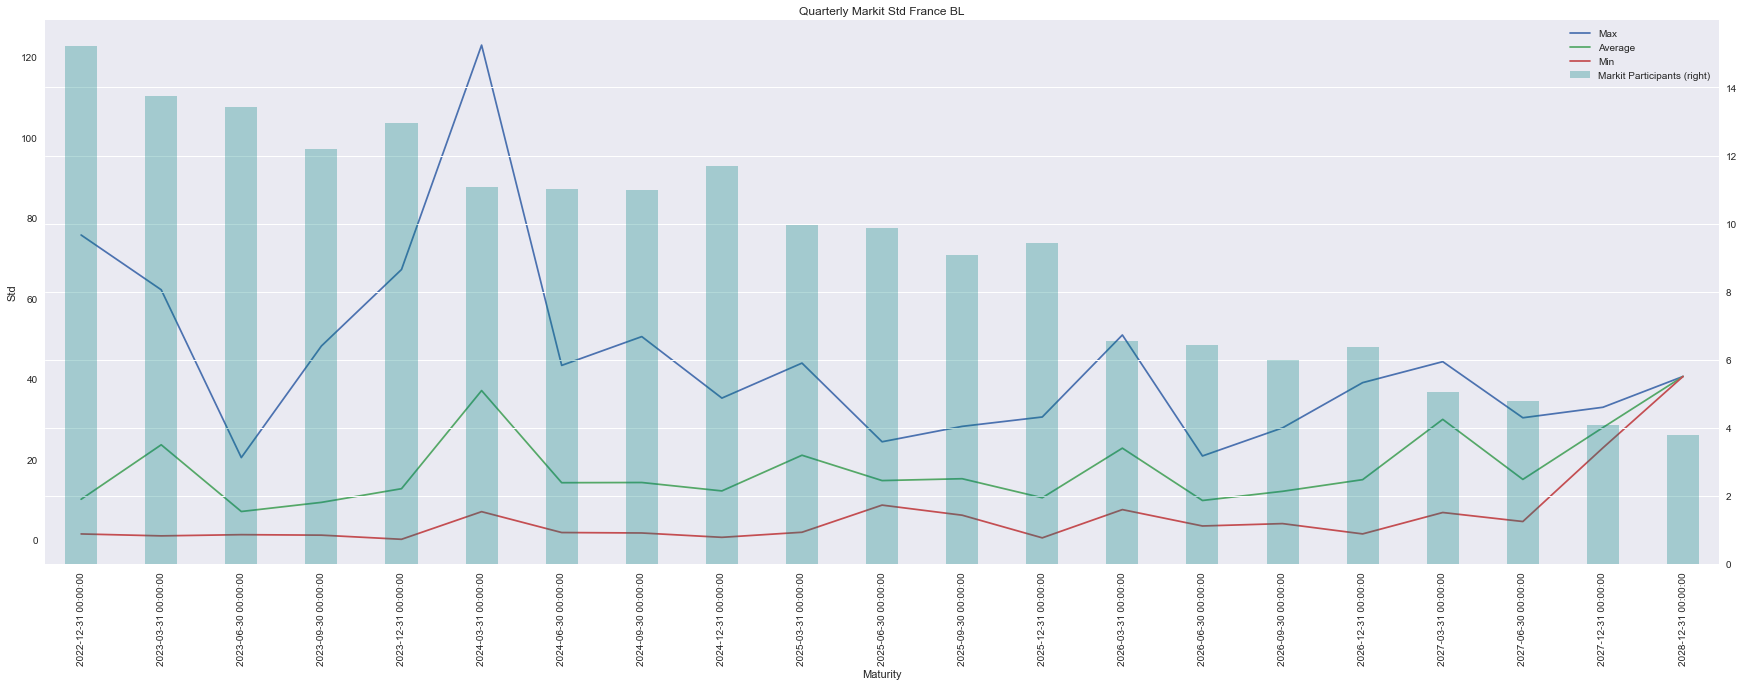

In [5]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std France BL")

ax1=recap_Fra_quarters.loc['Max'].plot(legend = True)
ax1=recap_Fra_quarters.loc['Average'].plot(legend = True)
ax1= recap_Fra_quarters.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Fra_quarters.loc['Markit Participants'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)
#ax1.set_xticklabels( rotation=45 ) ;

In [6]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

5.89
44.72
17.82


In [7]:
quarters_ST = recap_Fra_quarters.columns[:5] 
quarters_LT = recap_Fra_quarters.columns[5:] 

In [8]:
print(round(recap_Fra_quarters.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_ST].mean(),2))

0.96
54.72
12.51


In [9]:
print(round(recap_Fra_quarters.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_LT].mean(),2))

7.43
41.59
19.47


### Analyse Months

In [10]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Month') ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Markit Participants', "% NaN"])
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_months.shape[1]):
      recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
      recap_Fra_months.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100, 2)
      
recap_Fra_months.dropna(inplace = True, axis='columns')
recap_Fra_months
recap_Fra_months.to_csv("France Quarters BL")


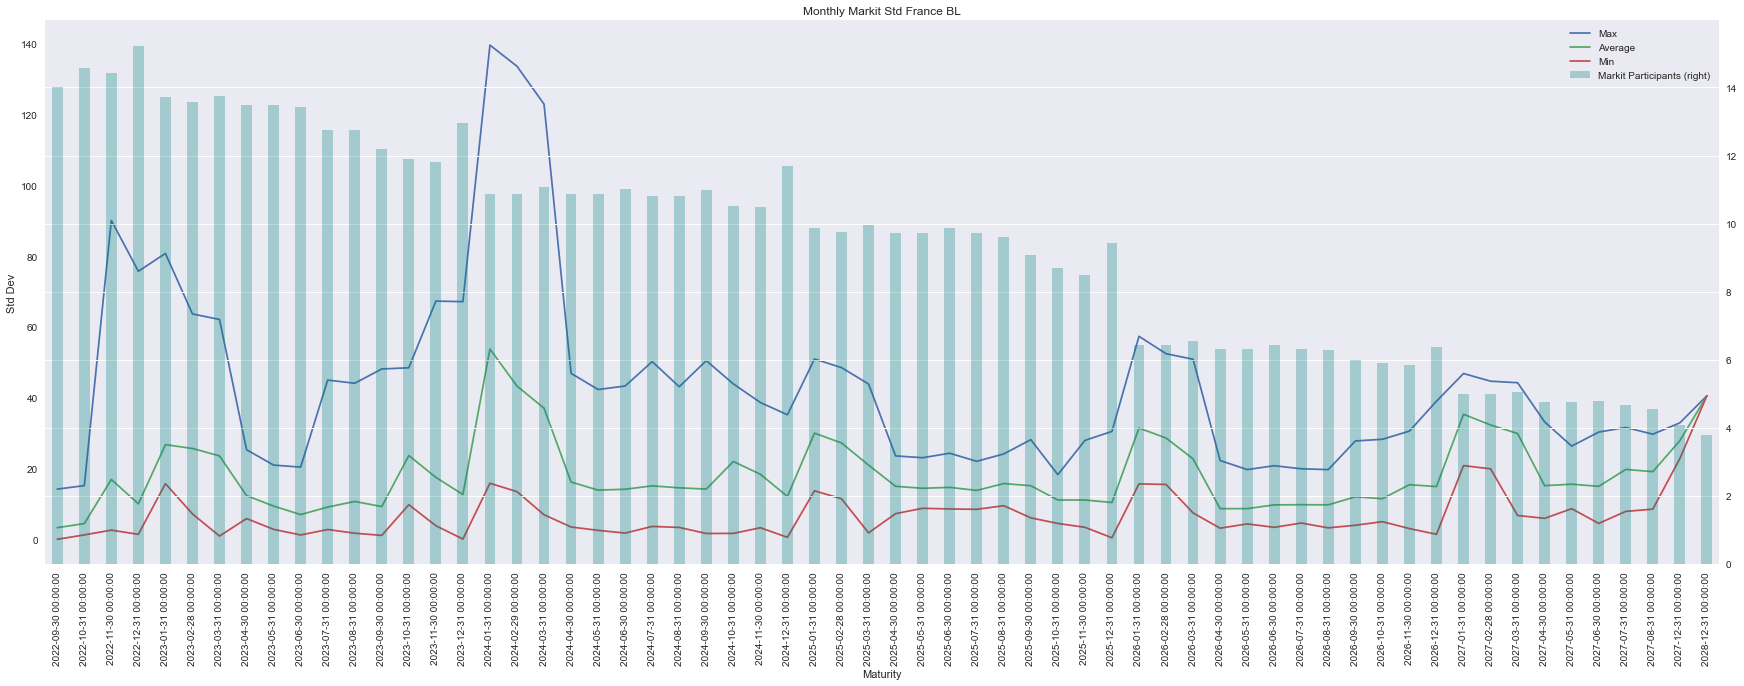

In [11]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std France BL")

recap_Fra_months.loc['Max'].plot(legend = True)
recap_Fra_months.loc['Average'].plot(legend = True)
ax1= recap_Fra_months.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_months.loc['Markit Participants'].plot(kind = 'bar', secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True);

In [12]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

6.75
43.46
18.24


In [13]:
quarters_ST = recap_Fra_months.columns[:5] 
quarters_LT = recap_Fra_months.columns[5:] 

In [14]:
print(round(recap_Fra_months.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_ST].mean(),2))

4.21
55.21
12.3


In [15]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

6.97
42.42
18.77


### Analyse Years

In [16]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Year') ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Markit Participants', '% NaN'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
      recap_Fra_years.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_years.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100, 2)
 
recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years
recap_Fra_years.to_csv("France Years BL")

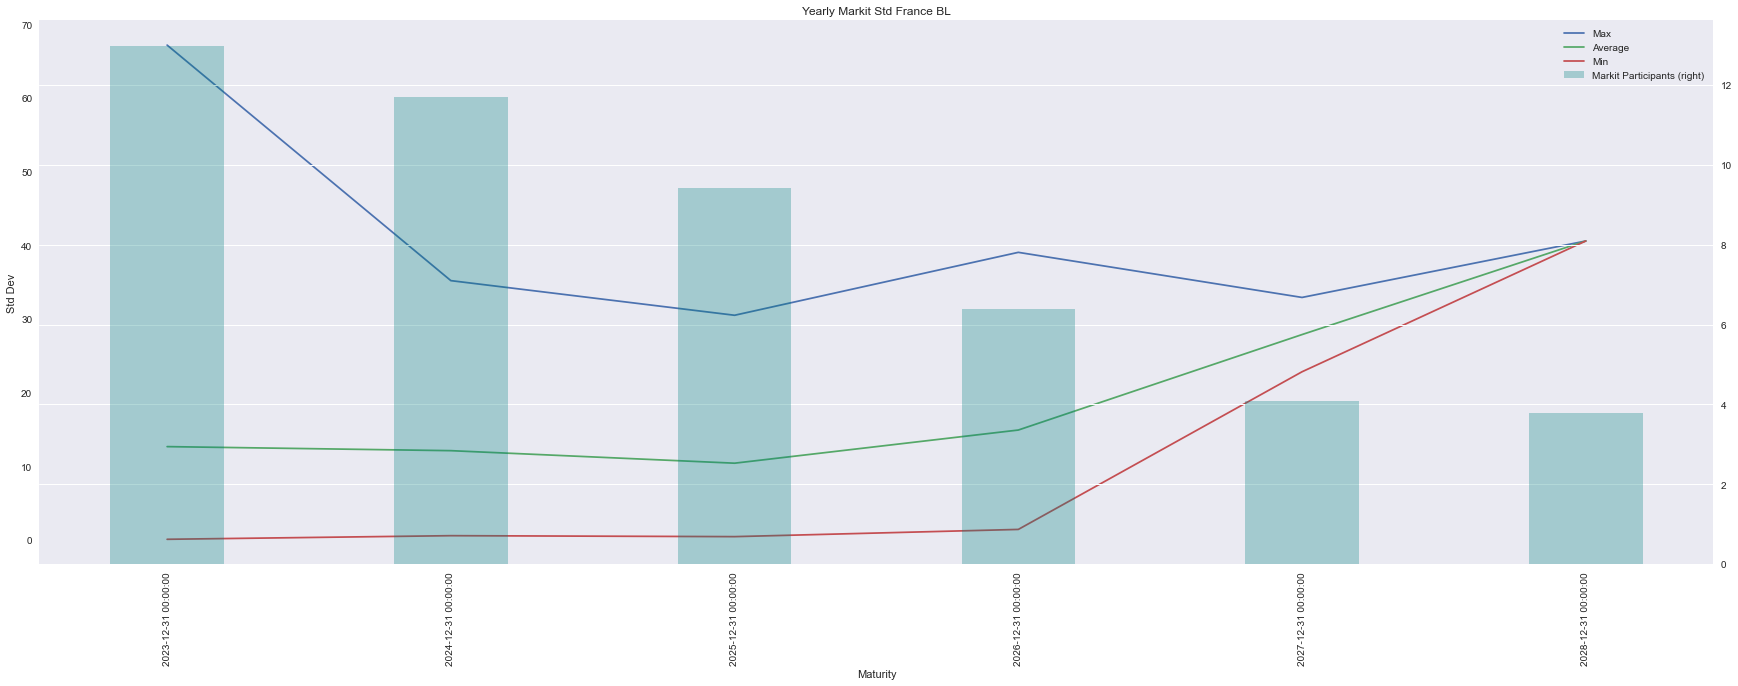

In [17]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std France BL")

recap_Fra_years.loc['Max'].plot(legend = True)
recap_Fra_years.loc['Average'].plot(legend = True)
ax1= recap_Fra_years.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_years.loc['Markit Participants'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)

In [18]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

10.99
40.9
19.76


In [19]:
quarters_ST = recap_Fra_years.columns[0] 
quarters_LT = recap_Fra_years.columns[0:] 

In [20]:
print(round(recap_Fra_years.loc["Min", quarters_ST],2))
print(round(recap_Fra_years.loc["Max", quarters_ST],2))
print(round(recap_Fra_years.loc["Average", quarters_ST],2))

0.09
67.17
12.67


In [21]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

10.99
40.9
19.76


## France Peaks Analysis

### Analyse Quarters

In [22]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Fra_quarters.dropna(inplace = True, axis='columns' )
recap_Fra_quarters

,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,2025-06-30 00:00:00,2025-09-30 00:00:00,2025-12-31 00:00:00,2026-03-31 00:00:00,2026-06-30 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,
Min,4.48,14.71,2.97,4.44,3.2,14.99,14.09,6.42,1.31,15.71,5.56,4.91,3.33,13.97,3.0,3.52,10.99,17.29,13.4
Average,45.79,89.19,30.09,34.94,50.54,89.03,38.39,37.44,29.93,45.37,27.29,23.69,27.29,48.31,14.19,17.2,50.23,48.5,17.77
Max,358.5,257.28,84.03,105.71,232.58,182.03,84.59,91.05,61.89,72.5,54.38,56.86,76.45,82.61,34.75,37.18,99.21,73.35,21.97
Nb of Prices,13.46,11.9,11.76,11.6,12.22,10.79,10.74,10.43,10.9,9.4,9.21,7.88,8.25,6.36,6.31,4.63,4.79,4.17,4.23


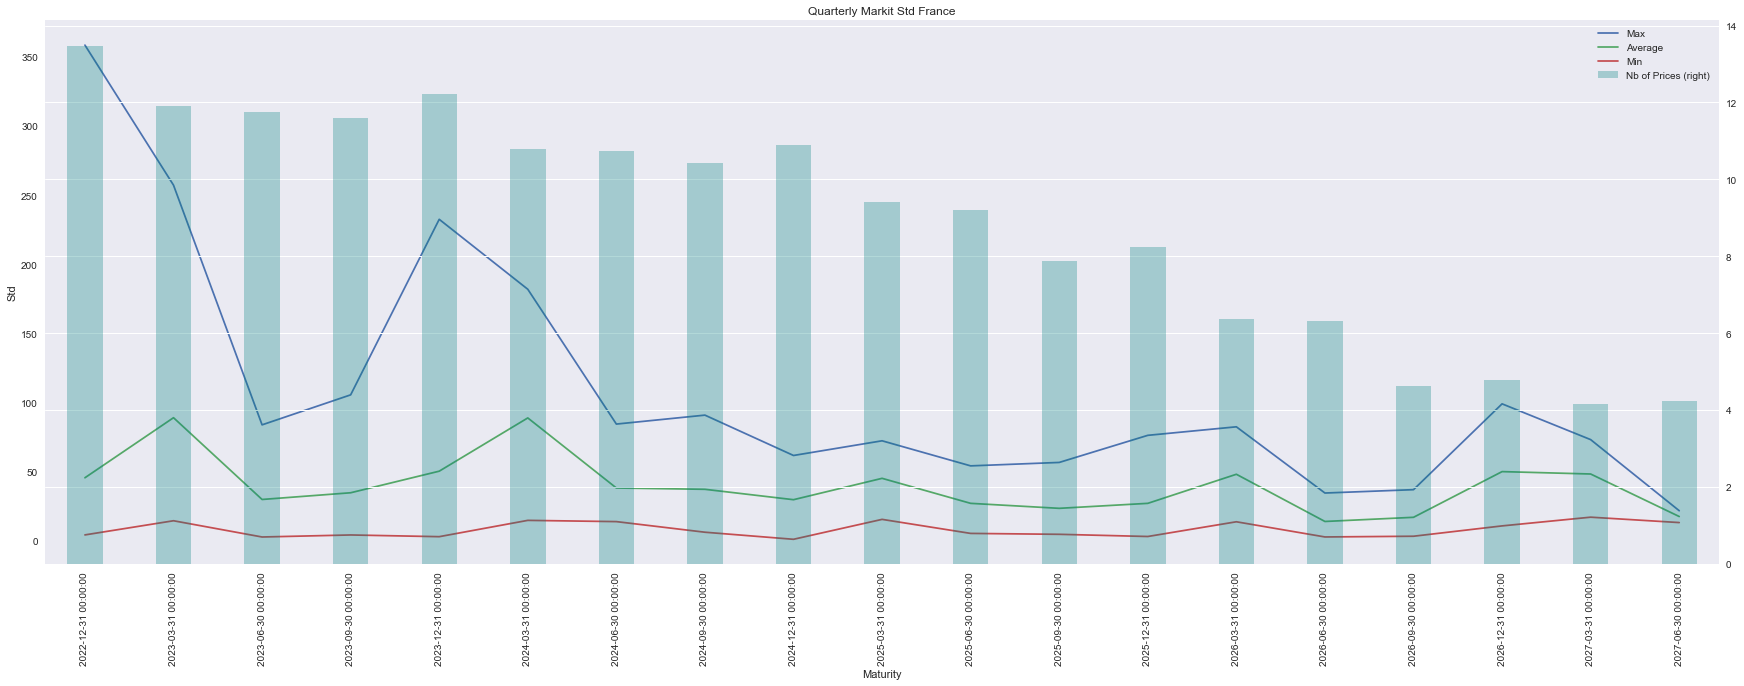

In [23]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std France")

recap_Fra_quarters.loc['Max'].plot(legend = True)
recap_Fra_quarters.loc['Average'].plot(legend = True)
ax1= recap_Fra_quarters.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")
ax1.legend(['Max', 'Average','Min'])

ax2 = recap_Fra_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)

In [24]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

8.33
108.79
40.27


In [25]:
quarters_ST = recap_Fra_quarters.columns[:5] 
quarters_LT = recap_Fra_quarters.columns[5:] 

In [26]:
print(round(recap_Fra_quarters.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_ST].mean(),2))

5.96
207.62
50.11


In [27]:
print(round(recap_Fra_quarters.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_LT].mean(),2))

9.18
73.49
36.76


### Analyse Months

In [28]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_months.dropna(inplace = True, axis='columns' )
recap_Fra_months

,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,...,2026-11-30 00:00:00,2026-12-31 00:00:00,2027-01-31 00:00:00,2027-02-28 00:00:00,2027-03-31 00:00:00,2027-04-30 00:00:00,2027-05-31 00:00:00,2027-06-30 00:00:00,2027-07-31 00:00:00,2027-08-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,1.0,4.9,9.82,4.48,40.76,42.58,14.71,7.13,6.15,2.97,...,47.28,10.99,67.7,64.87,17.29,16.07,10.46,13.4,20.13,16.82
Average,10.41,28.64,72.93,45.79,111.67,100.97,89.19,29.17,27.08,30.09,...,71.99,50.23,73.06,69.91,48.5,18.44,14.06,17.77,25.21,21.08
Max,36.6,207.5,273.26,358.5,214.03,219.48,257.28,87.19,78.47,84.03,...,99.07,99.21,78.43,74.95,73.35,20.81,17.67,21.97,30.29,25.33
Nb of Prices,12.48,12.62,12.57,13.46,12.0,11.9,11.9,11.52,11.48,11.76,...,4.45,4.79,4.05,4.05,4.17,4.11,4.11,4.23,4.11,4.11


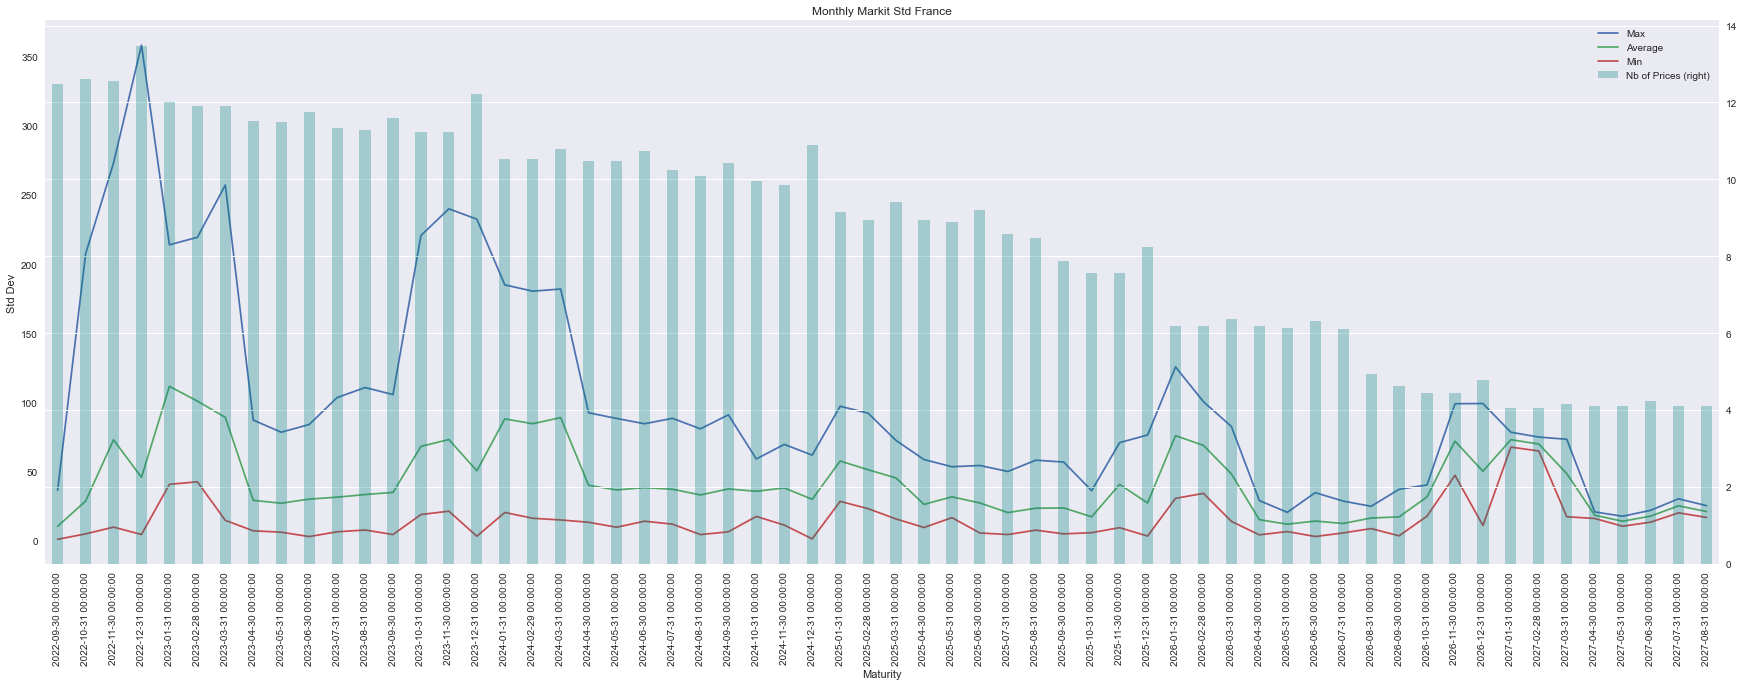

In [29]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std France")

recap_Fra_months.loc['Max'].plot(legend = True)
recap_Fra_months.loc['Average'].plot(legend = True)
ax1= recap_Fra_months.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True);

In [30]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

14.77
98.94
42.35


In [31]:
quarters_ST = recap_Fra_months.columns[:5] 
quarters_LT = recap_Fra_months.columns[5:] 

In [32]:
print(round(recap_Fra_months.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_ST].mean(),2))

12.19
217.98
53.89


In [33]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

15.0
88.12
41.3


### Analyse Years

In [34]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,
Min,3.2,1.31,3.33,10.99
Average,50.54,29.93,27.29,50.23
Max,232.58,61.89,76.45,99.21
Nb of Prices,12.22,10.9,8.25,4.79


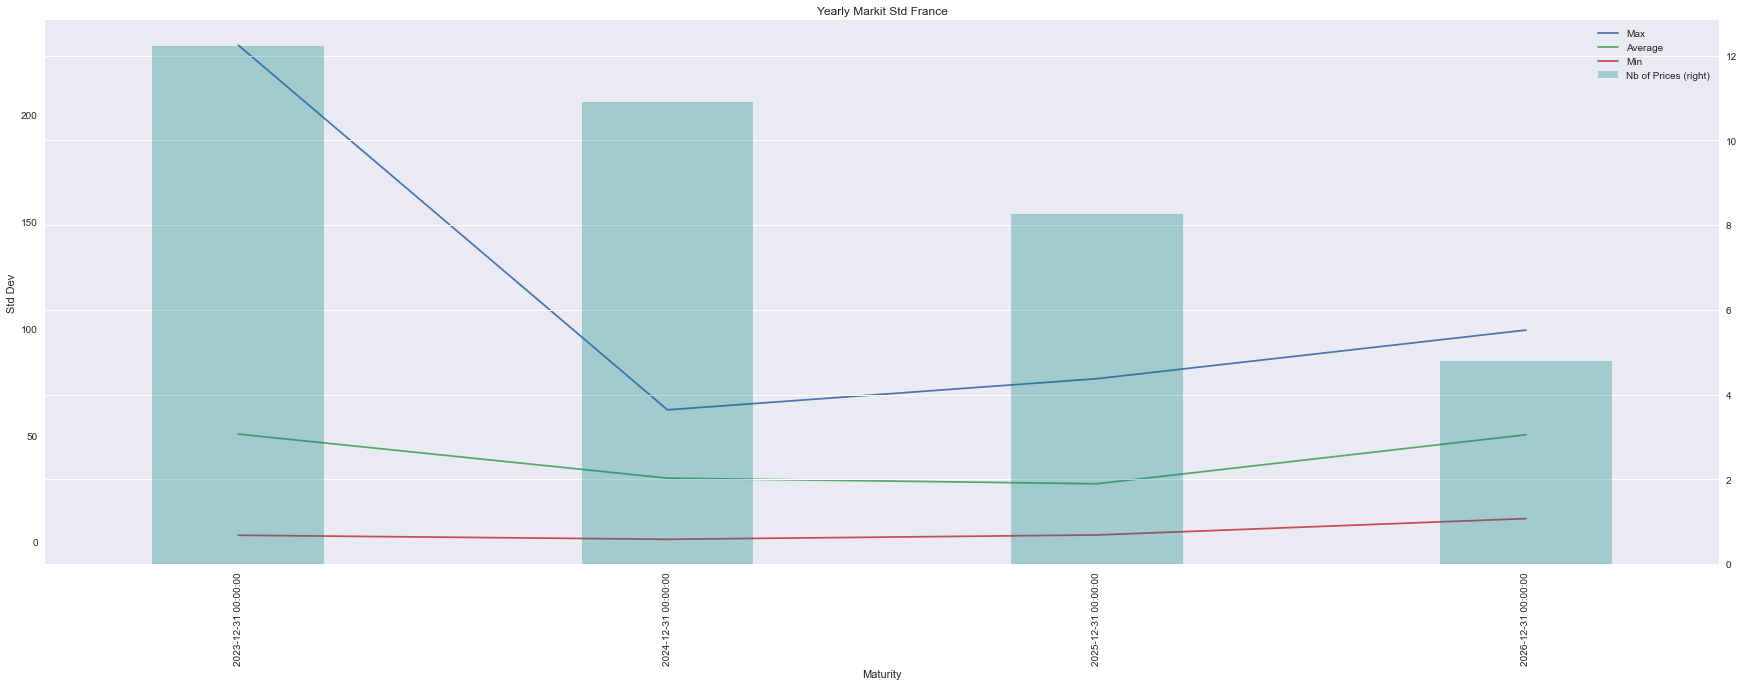

In [35]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std France")

recap_Fra_years.loc['Max'].plot(legend = True)
recap_Fra_years.loc['Average'].plot(legend = True)
ax1= recap_Fra_years.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True );

In [36]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

4.71
117.53
39.5
